## Atividade 01 - Parte 01 - Inventário de emissões utilizando Python
Alunas: Marilia Meister e Maria Natalia

Professor: Leonardo Hoinaski

Abrindo planilha de fatores de emissões compilada.
Nosso empreendimento é a Porto Bello, do ramo de revestiemnto cerâmico. Portanto usamos o capítulo 11.7 da AP42 https://www.epa.gov/sites/default/files/2020-10/documents/c11s07.pdf

ETAPA 1 - Planilhar em arquivo .csv os fatores de emissão para cada processo do seu empreendimento (linhas) e para cada poluente (colunas).

In [88]:
import pandas as pd              #Importa a biblioteca pandas as pd
import os                        #Importa a biblioteca os

cwd = os.getcwd()                # cwd recebe o endereço do script

path = cwd+'\\tabelas\\FE'      #path recebe o endereço onde está o arquivo do fatores de emissão
print(path)                     #imprime o path para verificação

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path + '\\'+file )
display(fe)

#OBS.: Os dados já estão convertidos para a unidade [kg/ton]

C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\tabelas\FE
chp_11_7.csv


,Source,PM,SO2,NOX
0,BMP,0.0600,NaN,NaN
1,Secador,1.1500,NaN,NaN
2,Resfriador,0.0550,NaN,NaN
3,Granulacao,0.0950,NaN,NaN
4,Queima,0.2450,104.5,0.27
5,Refrigeracao,0.0335,NaN,NaN
6,Esmaltacao,0.0950,NaN,NaN


ETAPA 2- Elaborar uma função para ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento

1
2
3


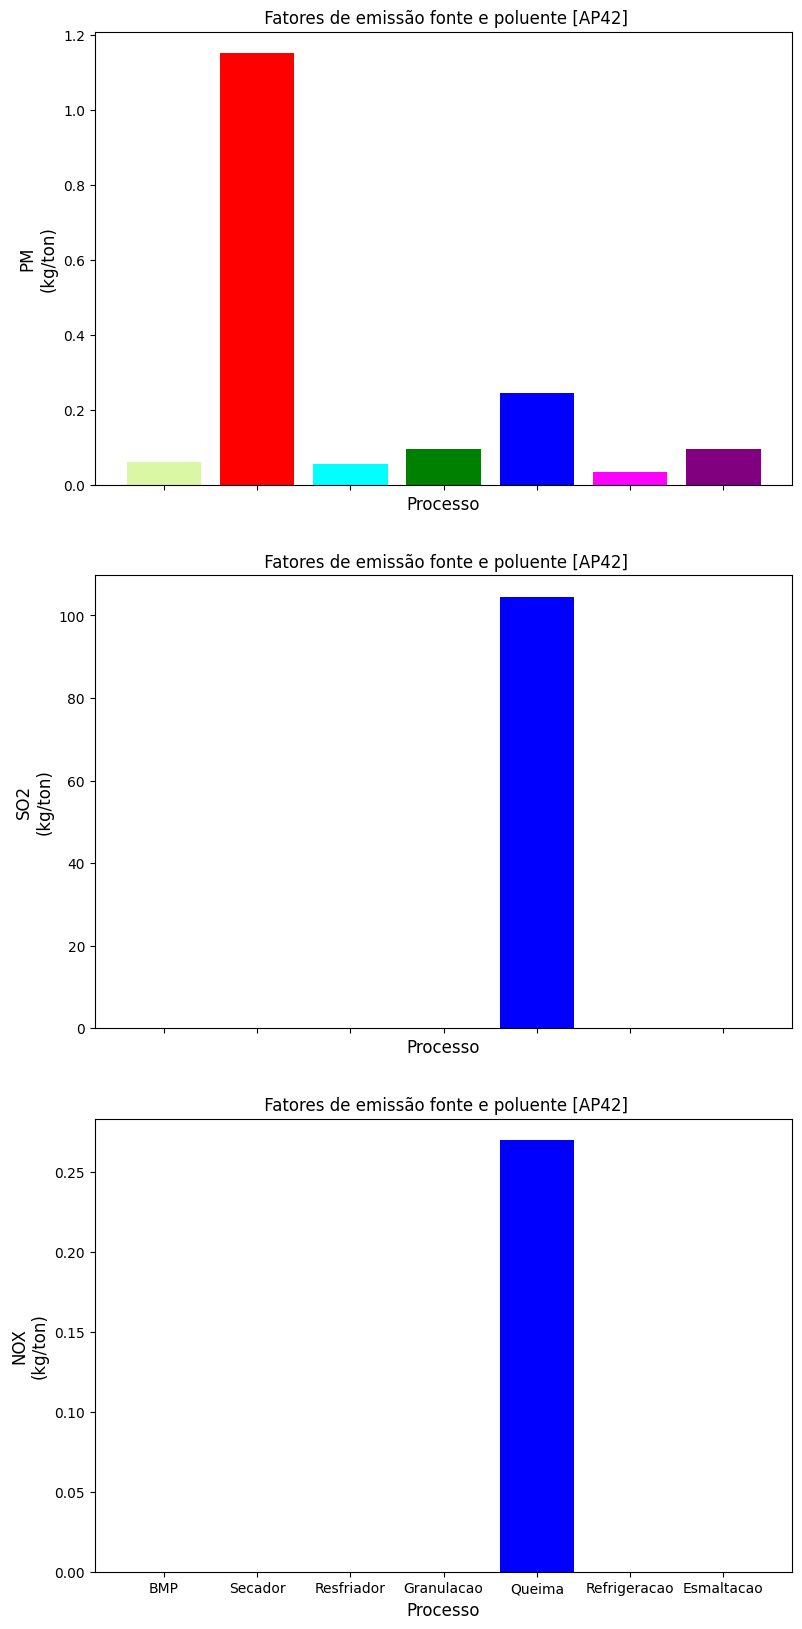

In [89]:
#Função para ler a Planilha de fatores de Emissão
import matplotlib.pyplot as plt                                           #criar visualizações gráficas, como gráficos e plots.

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 20))  #Essa linha de código está preparando a estrutura para plotar os dados de cada 
                                                                          #poluente em um subplot separado, todos compartilhando o mesmo eixo x.

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):                                       # Este loop for itera sobre os númer os de 1 até o número de COLUNAS em fe (len(fe.columns)). O uso de range(1, len(fe.columns)) exclui a primeira coluna 
    print(ii)                                                              
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan', 'green', 'blue', 'magenta','purple'])
    ax[ii-1].set_xlabel('Processo', fontsize=12)                          #fontsize=12 é um argumento usado para definir o tamanho da fonte
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(kg/ton)', fontsize=12)
    ax[ii-1].set_title(' Fatores de emissão fonte e poluente [AP42]', fontsize=12)

#Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

Estimando a emissão com base na taxa de atividade do empreendimento. 
Nesta sessão nós determinamos uma taxa de atividade [ton/d] da empresa Porto Bello, com base na produção do ano de 2023
(Produção de 26.000.000 m² de cerâmica produzida no ano de 2023). A conversão da mesma está detalhada no relatório. 


In [91]:
# Definindo a taxa de atividade em [ton/d]
ativ = 1489

#Definindo a função para a estimativa da emissão, essa sera usada novamente na etapa 4
#Multiplicando as colunas de fe [kg/ton] pela atividade [ton/d]
emissao_mp = (fe['PM']*ativ)*1000     #  [kg/ton]*[ton/d]*1000 = [g/d]       
emissao_so2 = (fe['SO2']*ativ)*1000   # [kg/ton]*[ton/s]*1000 = [g/d]
emissao_nox = (fe['NOX']*ativ)*1000  # [kg/ton]*[ton/s]*1000 = [g/d]

ETAPA 3- Elaborar uma função para criar uma variabilidade na taxa de atividade do empreendimento, com 
componentes aleatória e sazonal (com base nas datas do ano de 2023).

In [92]:
#Nesta seção é criado um DataFrame com frequencia horária e a variabilidade da taxa do empreendimento
import pandas as pd
import numpy as np

# Criando um intervalo de datas de 2023 com resolução diária
Datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criando um DataFrame com as datas
df = pd.DataFrame({'Datas': Datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Datas'].dt.month

# Extrair os semanas das datas e adicioná-los como uma nova coluna no DataFrame
# Criando valor da semana 
sem = np.full(len(df),1)
for i in range(167,8760,168):
    sem[i:] += 1
df['Semana'] = sem
#criar um array de 1 a 365 e colocar igual a df['Dia']
df['Dia'] = df['Datas'].dt.dayofyear  

# Criando vetor de valores aleatórios
import numpy as np
atvMed = ativ/365           # Dividrir a taxa de atividade que está em [ton/d] por 365, ressulta na atividade média diária no ano de 2023
atvMax = atvMed*1.1        #[ton/d] 
atvMin = atvMed*0.1        #[ton/d] 
                            
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
ativ_ale = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade [ton/d]'] = ativ_ale   #[ton/d]

# Mostrar o DataFrame resultante
df.set_index('Datas',inplace=True)
display(df)


,Mes,Semana,Dia,atividade [ton/d]
Datas,,,,
2023-01-01,1,1,1,2.587312
2023-01-02,1,1,2,1.482251
2023-01-03,1,1,3,4.237234
2023-01-04,1,1,4,2.650647
2023-01-05,1,1,5,0.901248
...,...,...,...,...
2023-12-27,12,3,361,2.067294
2023-12-28,12,3,362,2.410877
2023-12-29,12,3,363,2.081083


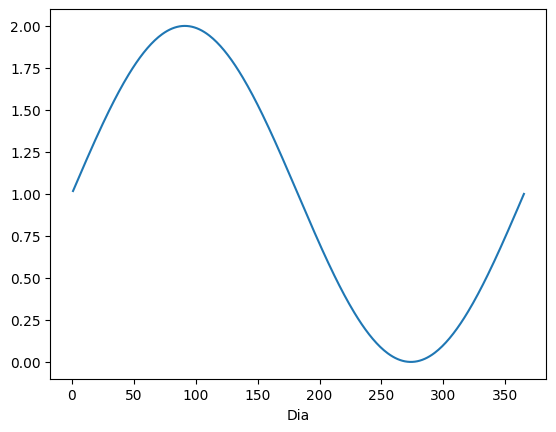

In [93]:
# Criando componente sazonal
df['sazonalidade'] = (np.sin(2* np.pi * df['Dia'] / 365)) + 1
# Adicionando nomes aos eixos
plt.xlabel('Dia')
plt.ylabel('')
plt.plot(df['Dia'],df['sazonalidade'])

,Mes,Semana,Dia,atividade [ton/d],sazonalidade,aleatorioSazonal
Datas,,,,,,
2023-01-01,1,1,1,2.587312,1.017213,2.631848
2023-01-02,1,1,2,1.482251,1.034422,1.533272
2023-01-03,1,1,3,4.237234,1.051620,4.455959
2023-01-04,1,1,4,2.650647,1.068802,2.833018
2023-01-05,1,1,5,0.901248,1.085965,0.978724
...,...,...,...,...,...,...
2023-12-27,12,3,361,2.067294,0.931198,1.925059
2023-12-28,12,3,362,2.410877,0.948380,2.286428
2023-12-29,12,3,363,2.081083,0.965578,2.009449


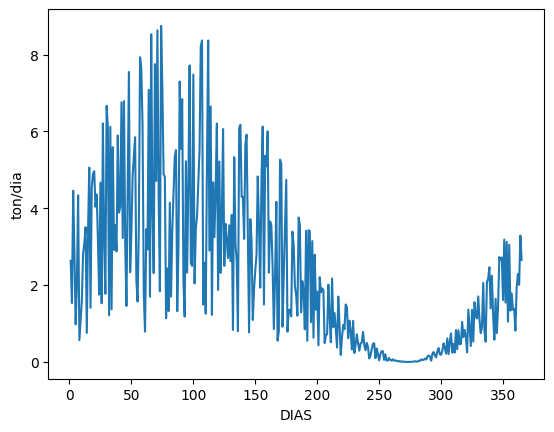

In [94]:
# Valores aleatórios com sazonalidade

df['aleatorioSazonal'] = df['atividade [ton/d]'] * df['sazonalidade'] 

#Plotando o gráfico
plt.plot(df['Dia'], df['aleatorioSazonal'])
display(df)
# Adicionando nomes aos eixos
plt.xlabel('DIAS')
plt.ylabel('ton/dia')

# Exibindo o gráfico
plt.show()
#Salvar planilha!!!!!!!!!!!!!!adicionar esta pasta no .gitignore)

ETAPA 4 - Estimar as emissões com a função criada em 2  com os dados de entrada criados em 3.

In [95]:
#ESTIMANDO EMISSÃO
#Multiplicando as colunas de "fe [kg/ton]" da AP42 pela COLUNA "Atividade [ton/d]" 	

#Como quero apresentar a emissão total de cada processo, irei somar a coluna da atividade para poder multiplicar pelo fator de emissão

#Somando a atividade aleatória calculada anteriormente
atv_ale = (int(df['atividade [ton/d]'].mean()))/86400      #Ao dividir por 86400 tornei [ton/d] para [ton/s]
#atv_ale = df['Atividade [ton/d]']

#Emissões 
emi_mp = (fe['PM']*atv_ale)*1000      # [kg/ton]*[ton/s]*1000=[g/s]       
emi_so2 = (fe['SO2']*atv_ale)*1000    # [kg/ton]*[ton/s]*1000=[g/s] 
emi_nox = (fe['NOX']*atv_ale)*1000    # [kg/ton]*[ton/s]*1000=[g/s] 

# Criar um novo DataFrame com as emissões calculadas
em = pd.DataFrame({
    'Source': fe['Source'],
    'Emissao_MP [g/s]': emi_mp,
    'Emissao_SO2 [g/s]': emi_so2,
    'Emissao_NOX [g/s]': emi_nox
})
display(fe)
display(em)  #Mostra as emissões totais por processo
#em.to_csv(r"C:\Users\Marilia\Documents\ENS5173_202401\ENS5173_202401\tabelas\emissoesPortoBello.csv")

,Source,PM,SO2,NOX
0,BMP,0.0600,NaN,NaN
1,Secador,1.1500,NaN,NaN
2,Resfriador,0.0550,NaN,NaN
3,Granulacao,0.0950,NaN,NaN
4,Queima,0.2450,104.5,0.27
5,Refrigeracao,0.0335,NaN,NaN
6,Esmaltacao,0.0950,NaN,NaN


,Source,Emissao_MP [g/s],Emissao_SO2 [g/s],Emissao_NOX [g/s]
0,BMP,0.001389,NaN,NaN
1,Secador,0.026620,NaN,NaN
2,Resfriador,0.001273,NaN,NaN
3,Granulacao,0.002199,NaN,NaN
4,Queima,0.005671,2.418981,0.00625
5,Refrigeracao,0.000775,NaN,NaN
6,Esmaltacao,0.002199,NaN,NaN


Qual é o processo do empreendimento que possui maior emissão? analise os fatores de emissão através de figuras, comparando os processos

O processo de queima é o que possui maior emisão como pode ser observado no gráfico abaixo. Emite 1048.62 g/s

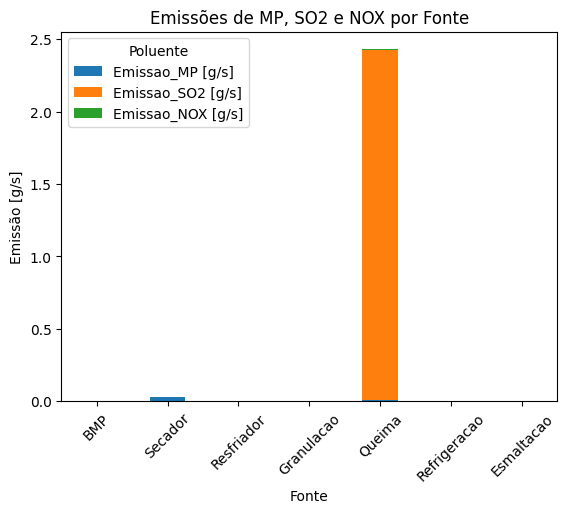

In [96]:

# Definindo as fontes como índice para facilitar a plotagem
em.set_index('Source', inplace=True)

# Definindo o tamanho da figura

# Plotando um gráfico de barras para cada fonte
em.plot(kind='bar', stacked=True)
plt.xlabel('Fonte')
plt.ylabel('Emissão [g/s]')
plt.title('Emissões de MP, SO2 e NOX por Fonte')
plt.xticks(rotation=45)
plt.legend(title='Poluente')
plt.show()

Qual a soma das emissões considerando todos os processos? qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

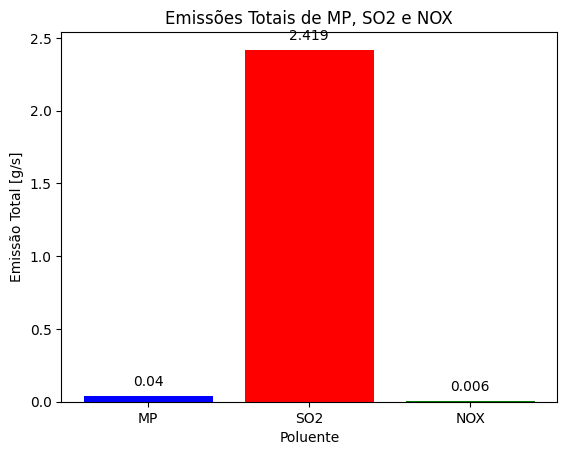

max =  2.465 med =  0.8216666666666667 min =  0.006


In [122]:
# Dados das emissões
MP =round(em['Emissao_MP [g/s]'].sum(),3)
SO2 = round(em['Emissao_SO2 [g/s]'].sum(),3)
NOX = round(em['Emissao_NOX [g/s]'].sum(),3)
emissions = [MP, SO2, NOX]


# Criando o gráfico de barras round(MP, 3)
bars = plt.bar(['MP', 'SO2', 'NOX'], emissions, color=['blue', 'red', 'green'])

# Adicionando os valores em cima das barras
for bar, emission in zip(bars, emissions):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(emission), ha='center', va='bottom')

# Adicionando rótulos
plt.xlabel('Poluente')
plt.ylabel('Emissão Total [g/s]')
plt.title('Emissões Totais de MP, SO2 e NOX')

# Exibindo o gráfico
plt.show()

#Média, máxima e mínima de todas as emissões
#Criando um DataFrame para os resultados totais
data = {
    'MP': [0.04],
    'SO2': [2.419],
    'NOX': [0.006]
}
df = pd.DataFrame(data)

# Somando todos os valores do DataFrame
soma_total = df.values.sum()

# Calculando o máximo, a média e o mínimo da soma total
max = df.values.sum()
med = df.values.mean()
min = df.values.min()

print('max = ', soma_max, 'med = ', soma_med, 'min = ', soma_min)
plt.show()